In [1]:
import pandas as pd
import seaborn as sb

In [8]:
data = pd.read_csv('CpuLogData.csv', error_bad_lines=False)
data.shape

b'Skipping line 4821: expected 41 fields, saw 65\n'


(18852, 41)

In [10]:
len(data['user_name'].unique())

64

In [12]:
data['Dates'] = pd.to_datetime(data['DateTime']).dt.date
data['Time'] = pd.to_datetime(data['DateTime']).dt.time

val_list = []
for i in data['boot_time']:
    value = str(i).split(',')
    if len(value) > 1:        
        value = value[1].split(':')
        value = float(value[0] + '.' + value[1])
        val_list.append(value)
    else:
        value = value[0].split(':')
        value = float(value[0] + '.' + value[1])
        val_list.append(value)
data['Boot_Time'] = val_list

In [50]:
old_data = []
new_data = []
d = ['2019-08-06']
for i in range(len(data)):
    if str(data['Dates'][i]) in d :
        new_data.append(data.iloc[i])
    else:
        old_data.append(data.iloc[i])

In [51]:
len(new_data), data.shape

(4098, (18852, 44))

In [52]:
new_df = pd.DataFrame(new_data, columns=data.columns)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

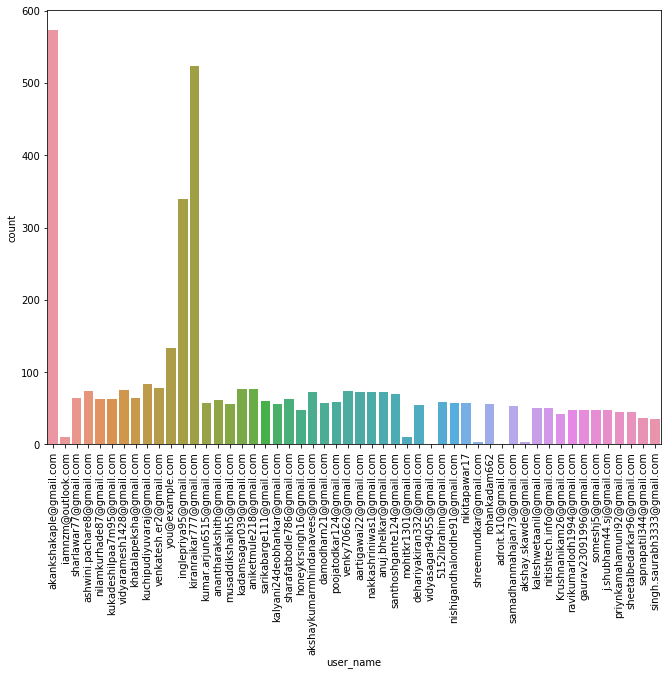

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

sb.countplot(x='user_name', data=new_df, ax=ax)
plt.xticks(rotation=90)

In [55]:
new_df['user_name'].value_counts()

akankshakaple@gmail.com              573
kiranraikar777@gmail.com             523
inglepriya95@gmail.com               340
you@example.com                      133
kuchipudiyuvaraj@gmail.com            83
venkatesh.er2@gmail.com               78
aniketmule218@gmail.com               77
kadamsagar039@gmail.com               76
vidyaramesh1428@gmail.com             75
ashwini.pachare8@gmail.com            74
venky70662@gmail.com                  74
aartigawai22@gmail.com                73
anuj.bhelkar@gmail.com                72
nakkashriniwas1@gmail.com             72
akshaykumarmhindanavees@gmail.com     72
santhoshgante124@gmail.com            70
sharlawar77@gmail.com                 64
khatalapeksha@gmail.com               64
nilamkurhade87@gmail.com              63
sharafatbodle786@gmail.com            63
kukadeshilpaa7m95@gmail.com           63
anantharakshith@gmail.com             62
sarikabarge111@gmail.com              60
poojatodkar124@gmail.com              59
5152ibrahim@gmai

In [59]:
# data[data['user_name'] == 'mohitkr1301@gmail.com']